In [17]:
pip install opencv-python scikit-learn matplotlib numpy

In [18]:
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
(X_train, y_train),(X_test, y_test)=fashion_mnist.load_data()
print("Training data shape:{X_train.shape}")
print("Training labels shape:{y_train.shape}")
print("Training data shape:{X_test.shape}")
print("Training labels shape:{y_test.shape}")

Training data shape:{X_train.shape}
Training labels shape:{y_train.shape}
Training data shape:{X_test.shape}
Training labels shape:{y_test.shape}


In [19]:
import pandas as pd
data=pd.read_csv('/content/fashion-mnist_test.csv.zip')

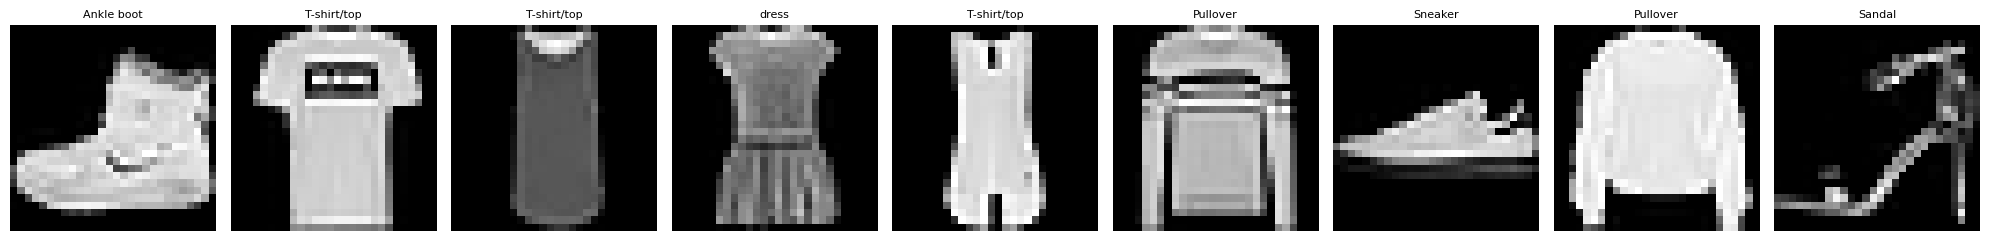

In [20]:
import matplotlib.pyplot as plt

def plot_initial_images(images, labels, class_names):
  fig, axes = plt.subplots(1, 9, figsize=(20, 3))
  for i in range(9):
    ax = axes[i]
    ax.imshow(images[i], cmap='gray')
    ax.set_title(class_names[labels[i]], fontsize=8)
    ax.axis('off')
  plt.tight_layout()
  plt.show()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plot_initial_images(X_train, y_train, class_names)







In [21]:
X_train =X_train/255.0
X_test=X_test/255.0
X_train=X_train.reshape(X_train.shape[0],28,28,1)
X_test=X_test.reshape(X_test.shape[0],28,28,1)

print(f"Processed training data shape: {X_train.shape}")
print(f"Processed training data shape: {X_test.shape}")

Processed training data shape: (60000, 28, 28, 1)
Processed training data shape: (10000, 28, 28, 1)


In [22]:
import cv2
from skimage.feature import hog
import numpy as np

def extract_hog_features(images):
  hog_features=[]
  for image in images:
    features=hog(image, pixels_per_cell=(4,4), cells_per_block=(2,2), visualize=False, multichannel=True)
    hog_features.append(features)
  return np.array(hog_features)
X_train_hog=extract_hog_features(X_train)
X_test_hog=extract_hog_features(X_test)

print(f"Hog training data shape: {X_train_hog.shape}")
print(f"Hog test data shape: {X_test_hog.shape}")

<ipython-input-22-fd7dc0d68ee8>:8: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  features=hog(image, pixels_per_cell=(4,4), cells_per_block=(2,2), visualize=False, multichannel=True)


Hog training data shape: (60000, 1296)
Hog test data shape: (10000, 1296)


In [23]:
from sklearn.svm import SVC


X_train_hog_subset = X_train_hog[:1000]
y_train_subset = y_train[:1000]

svm = SVC(kernel='linear')
svm.fit(X_train_hog_subset, y_train_subset)
train_accuracy = svm.score(X_train_hog_subset, y_train_subset)
print(f"Training accuracy: {train_accuracy*100:.2f}%")



Training accuracy: 100.00%


In [24]:
test_accuracy=svm.score(X_test_hog, y_test)
print(f"Test accuracy: {test_accuracy*100:.2f}%")

Test accuracy: 82.60%


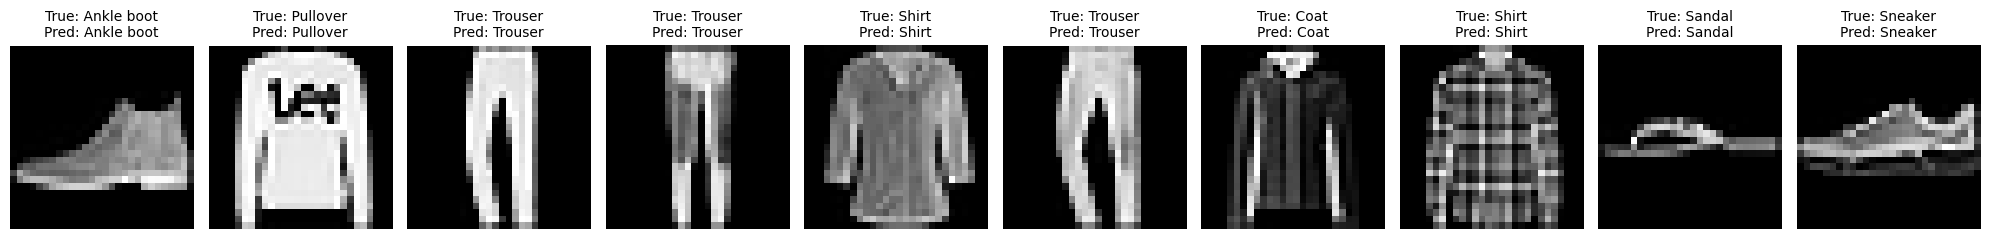

In [25]:
import matplotlib.pyplot as plt

y_pred = svm.predict(X_test_hog)

def plot_output_images(images, true_labels, predicted_labels, class_names):
  fig, axes = plt.subplots(1, 10, figsize=(20, 3))
  for i in range(10):
   ax = axes[i]
   ax.imshow(images[i].reshape(28, 28), cmap='gray')
   ax.set_title(f"True: {class_names[true_labels[i]]}\nPred: {class_names[predicted_labels[i]]}", fontsize=10)
   ax.axis('off')
  plt.tight_layout()
  plt.show()

plot_output_images(X_test[:10], y_test[:10], y_pred[:10], class_names)



In [26]:
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
(X_train, y_train),(X_test, y_test)=fashion_mnist.load_data()
print("Training data shape:{X_train.shape}")
print("Training labels shape:{y_train.shape}")
print("Training data shape:{X_test.shape}")
print("Training labels shape:{y_test.shape}")

Training data shape:{X_train.shape}
Training labels shape:{y_train.shape}
Training data shape:{X_test.shape}
Training labels shape:{y_test.shape}


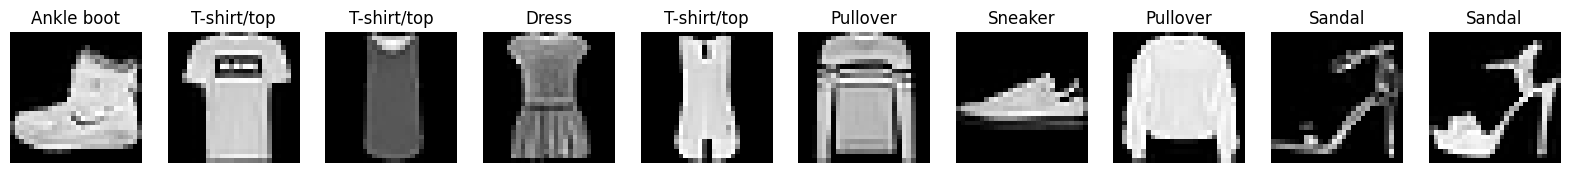

In [27]:
import matplotlib.pyplot as plt
def plot_initial_images(images, labels, class_names):
  fig, axes=plt.subplots(1,10, figsize=(20,3))
  for i in range(10):
    ax=axes[i]
    ax.imshow(images[i], cmap='gray')
    ax.set_title(class_names[labels[i]])
    ax.axis('off')
  plt.show()
class_names=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plot_initial_images(X_train, y_train, class_names)

In [28]:
X_train =X_train/255.0
X_test=X_test/255.0
X_train=X_train.reshape(X_train.shape[0],28,28,1)
X_test=X_test.reshape(X_test.shape[0],28,28,1)

print(f"Processed training data shape: {X_train.shape}")
print(f"Processed training data shape: {X_test.shape}")

Processed training data shape: (60000, 28, 28, 1)
Processed training data shape: (10000, 28, 28, 1)


In [29]:
from skimage.feature import hog
import numpy as np

def extract_hog_features(images):
    hog_features = []
    for image in images:
      features = hog(image, pixels_per_cell=(4, 4), cells_per_block=(2, 2), visualize=False, multichannel=True)
      hog_features.append(features)
    return np.array(hog_features)

X_train_hog = extract_hog_features(X_train)
X_test_hog = extract_hog_features(X_test)

print(f"Hog training data shape: {X_train_hog.shape}")
print(f"Hog test data shape: {X_test_hog.shape}")



<ipython-input-29-91b3becfbeae>:7: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  features = hog(image, pixels_per_cell=(4, 4), cells_per_block=(2, 2), visualize=False, multichannel=True)


Hog training data shape: (60000, 1296)
Hog test data shape: (10000, 1296)


In [30]:
from sklearn.svm import SVC


X_train_hog_subset = X_train_hog[:1000]
y_train_subset = y_train[:1000]

svm = SVC(kernel='linear')
svm.fit(X_train_hog_subset, y_train_subset)
train_accuracy = svm.score(X_train_hog_subset, y_train_subset)
print(f"Training accuracy: {train_accuracy*100:.2f}%")



Training accuracy: 100.00%


In [31]:
test_accuracy=svm.score(X_test_hog, y_test)
print(f"Test accuracy: {test_accuracy*100:.2f}%")

Test accuracy: 82.60%


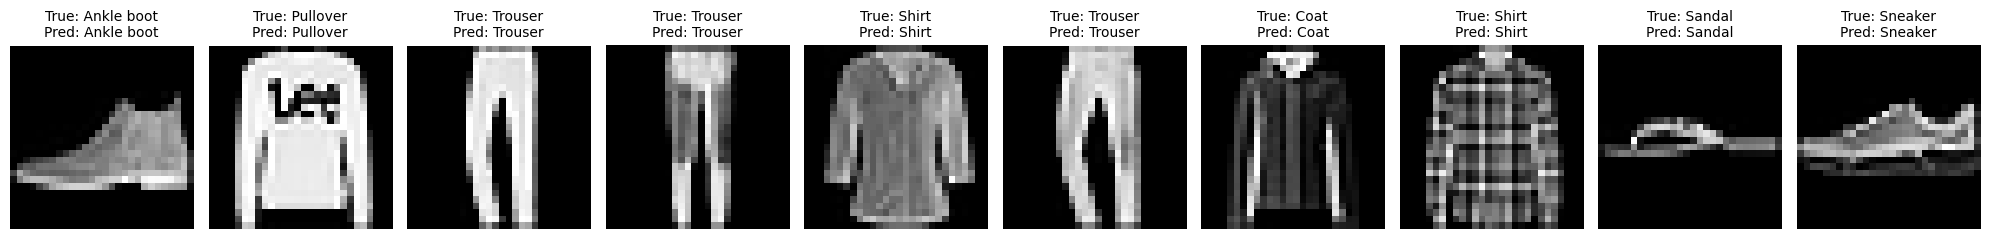

In [32]:
import matplotlib.pyplot as plt

y_pred = svm.predict(X_test_hog)

def plot_output_images(images, true_labels, predicted_labels, class_names):
  fig, axes = plt.subplots(1, 10, figsize=(20, 3))
  for i in range(10):
   ax = axes[i]
   ax.imshow(images[i].reshape(28, 28), cmap='gray')
   ax.set_title(f"True: {class_names[true_labels[i]]}\nPred: {class_names[predicted_labels[i]]}", fontsize=10)
   ax.axis('off')
  plt.tight_layout()
  plt.show()

plot_output_images(X_test[:10], y_test[:10], y_pred[:10], class_names)